# Version

In [1]:
from platform import python_version
print(python_version())

3.9.7


# # Libraries Import

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')#or[1 - True Negative Rate]
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    sns.set(font_scale=2)
    plt.show()

    return None

# Data Visualization/Exploratory analysis

  # -------------Start-------------

In [5]:
#we use it to change the default number of rows/columns and width to be displayed
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 100)

### Reading the dataset

In [6]:
c_data = pd.read_csv('creditcard.csv')
c_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset shape

In [7]:
# Checking data set shape
c_data.shape 

(284807, 31)

## Dataset information

In [8]:
#Checking data set full information
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## All columns 

In [9]:
c_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

## Describe Dataset

In [10]:
c_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Histogram

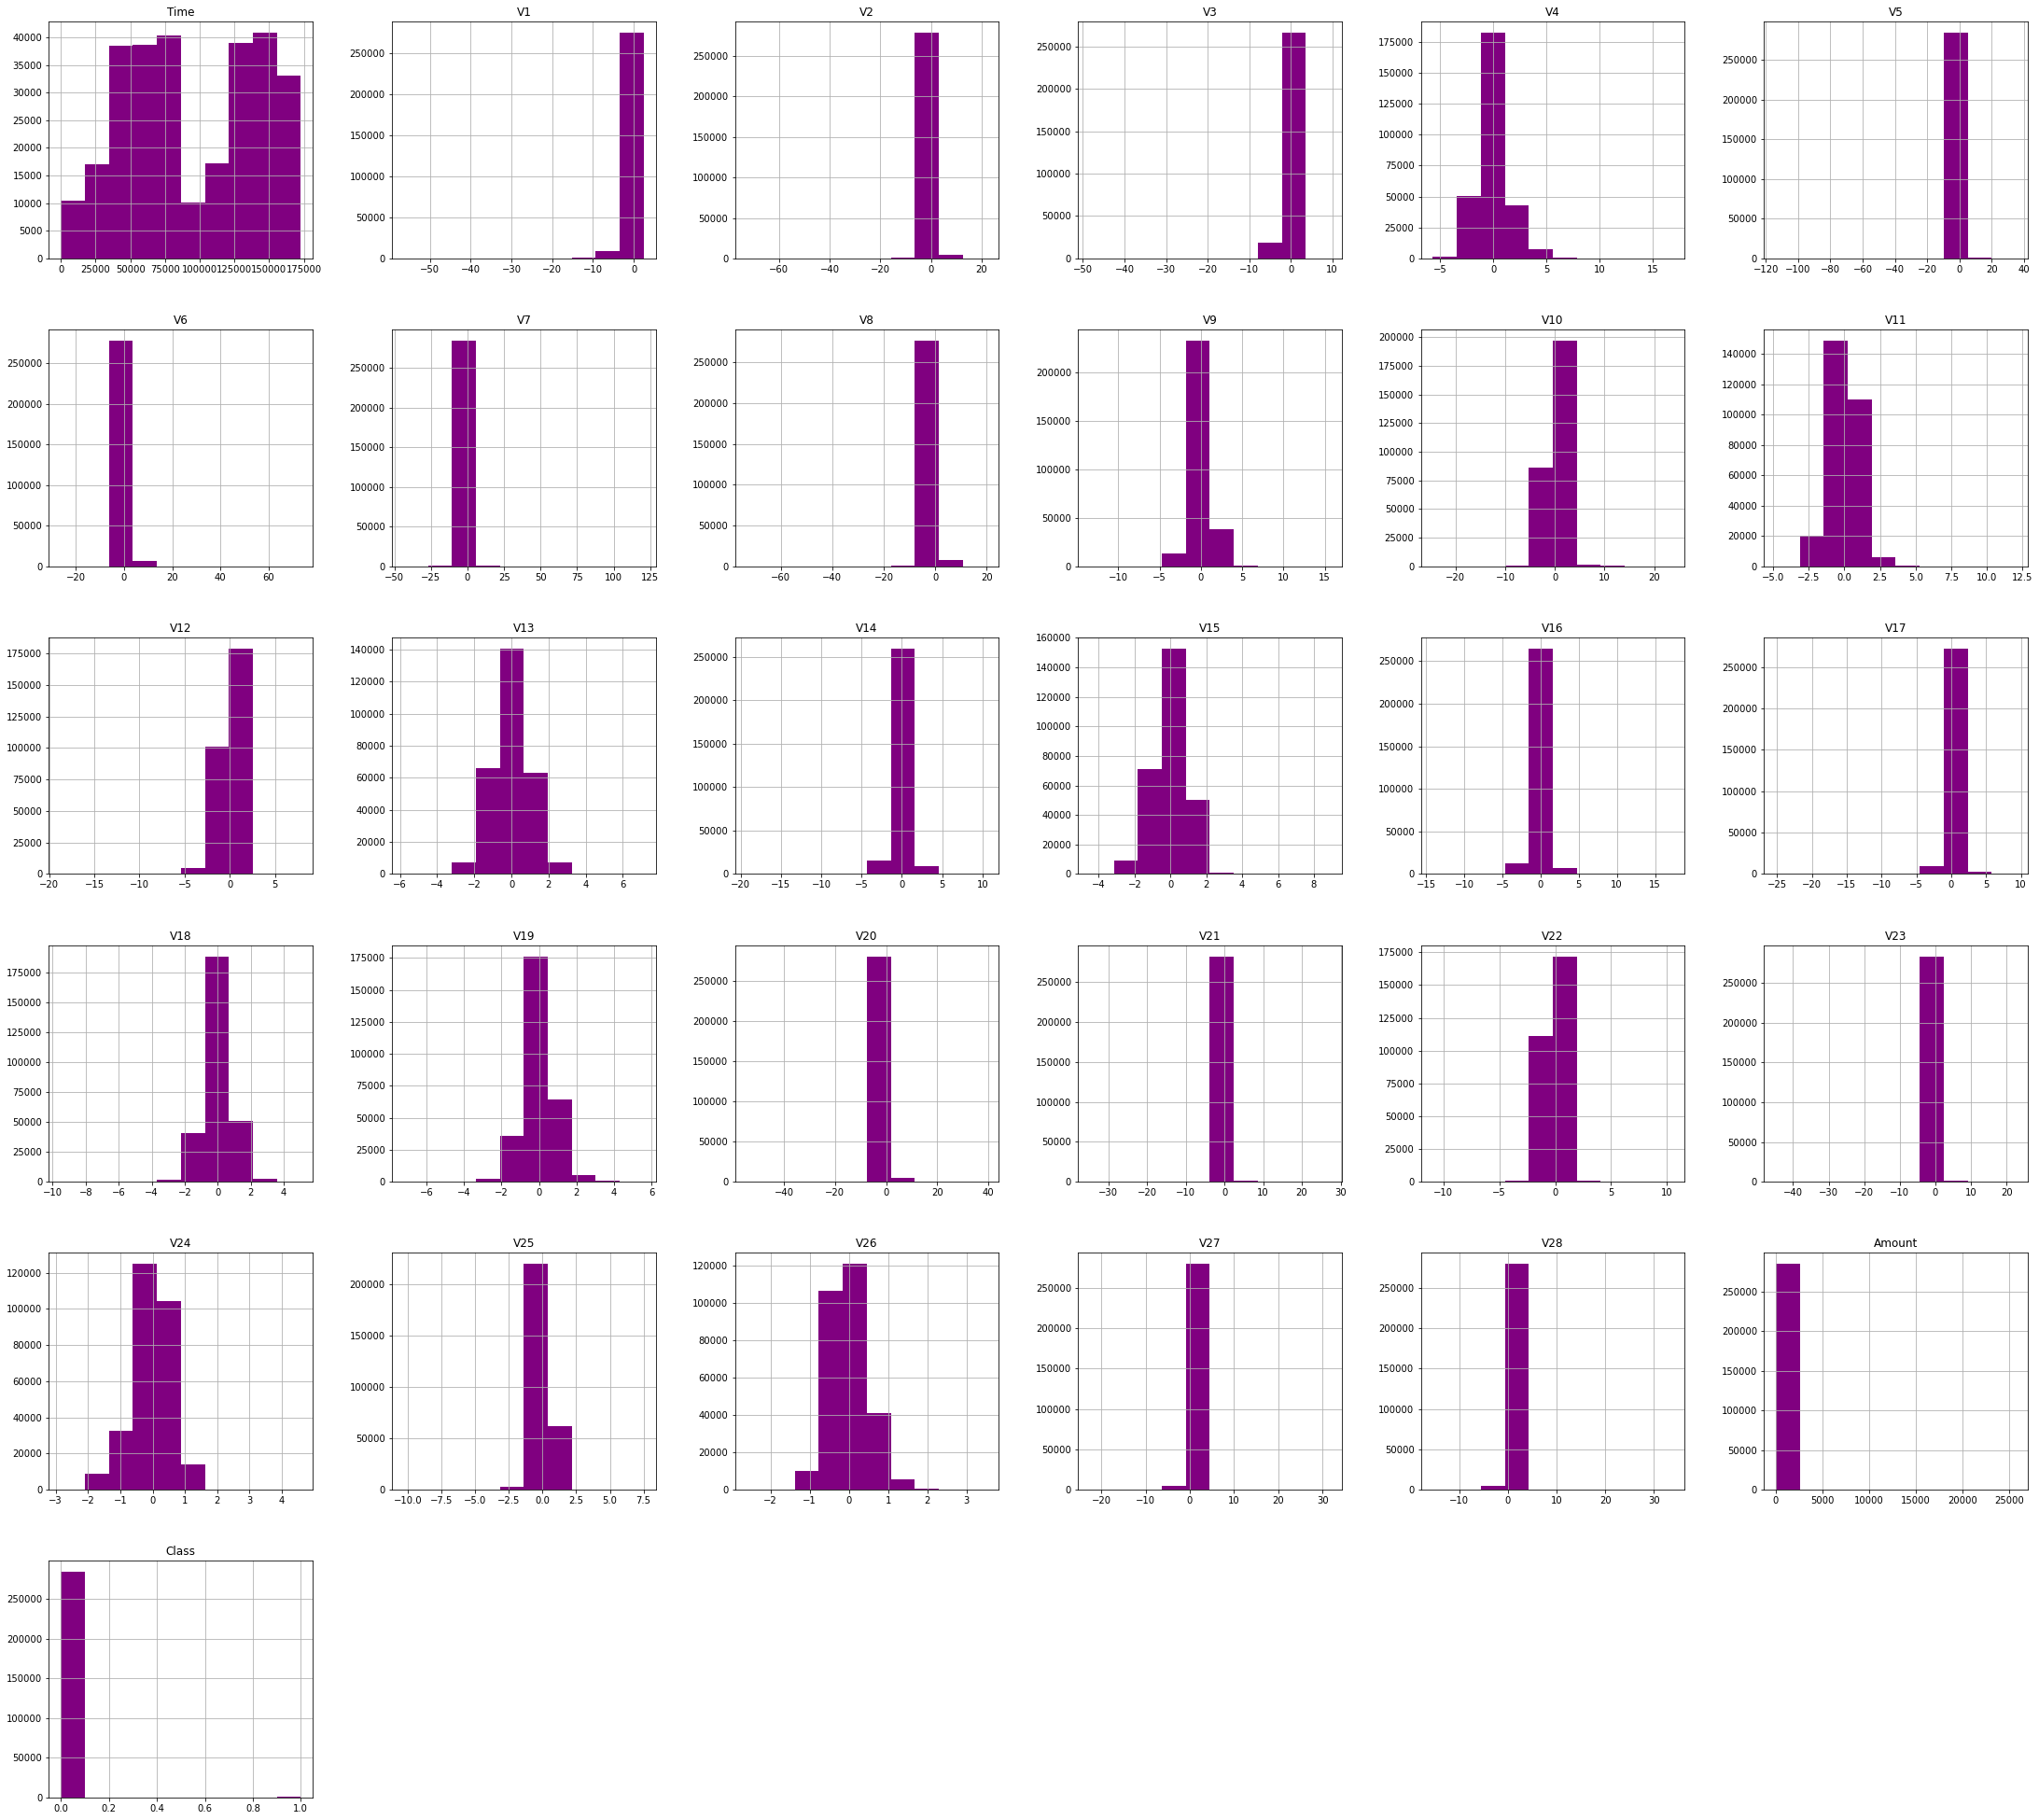

In [11]:
c_data.hist(figsize=(38,35),color='purple')
plt.show()

## Check Duplicated rows

In [12]:
c_data[c_data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


## remove duplicated rows

In [13]:
c_data.drop_duplicates(keep='first', inplace=True)

## Check Duplicated rows again

In [14]:
c_data.duplicated().sum()

0

## Dataset shape after drop duplicated column

In [15]:
c_data.shape

(283726, 31)

## Check missing values

In [16]:
c_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Corelation Matrix(Heatmap)

<AxesSubplot:>

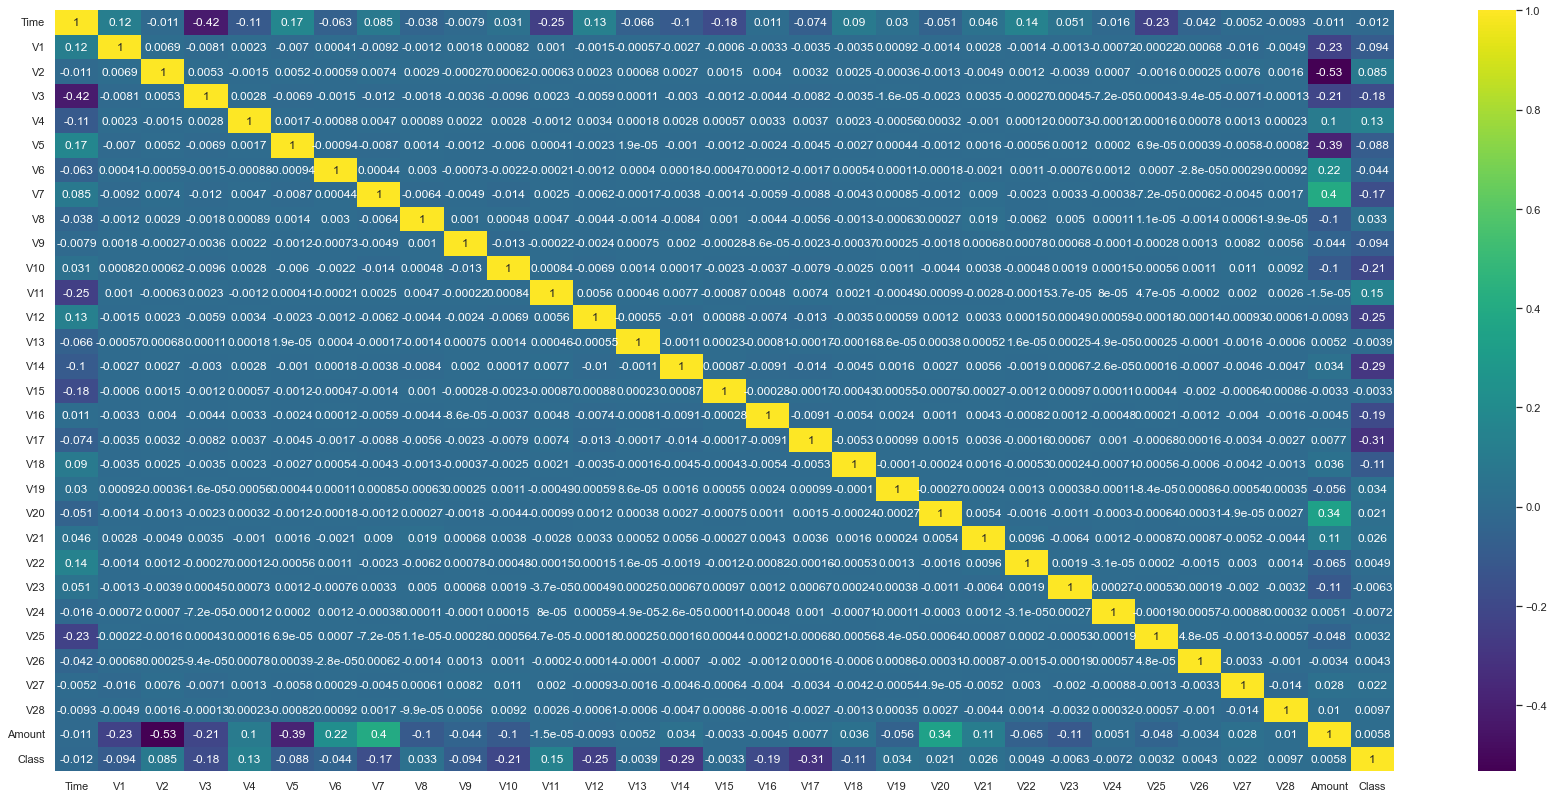

In [17]:
corr=c_data.corr()
plt.figure(figsize=(30,14))
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, cmap='viridis')

## selecting specific column

In [18]:
c_data_1=c_data.loc[:, ['Amount', 'Class', 'Time']]

In [19]:
c_data_1.head()

,Amount,Class,Time
0,149.62,0,0.0
1,2.69,0,0.0
2,378.66,0,1.0
3,123.50,0,1.0
4,69.99,0,2.0


## Correlation among 'Time', 'Amount' and 'Class' column

In [20]:
c_data_1.corr()

,Amount,Class,Time
Amount,1.000000,0.005777,-0.010559
Class,0.005777,1.000000,-0.012359
Time,-0.010559,-0.012359,1.000000


<AxesSubplot:>

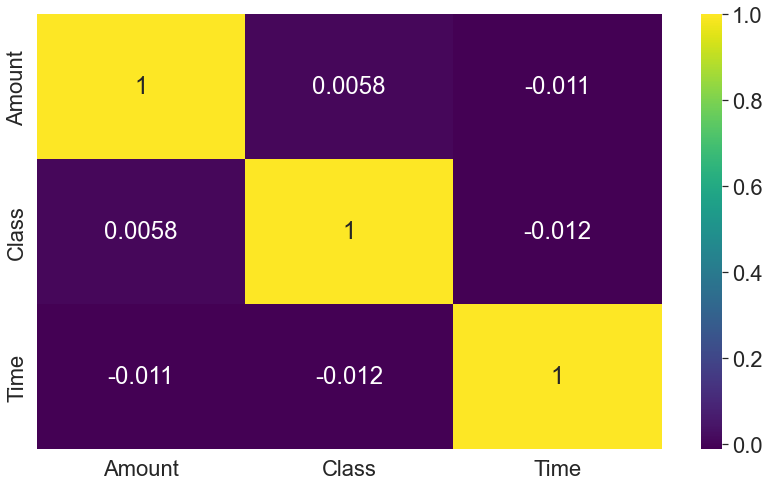

In [21]:
#Correlation among 'Time', 'Amount' and 'Class' column
#Very low correlation
corr=c_data_1.corr()
plt.figure(figsize=(14,8))
sns.set(font_scale=2)
sns.heatmap(corr, annot=True, cmap='viridis')


## Describing amount/class/Time column

In [22]:
c_data['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

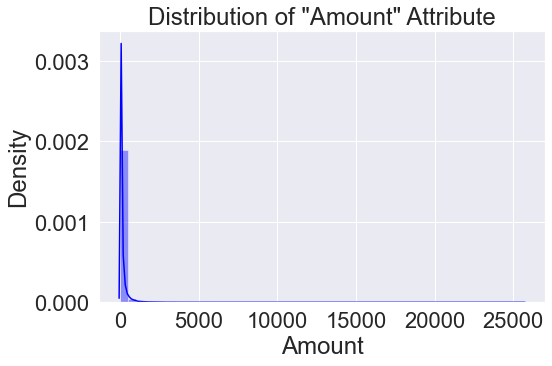

In [23]:
plt.figure(figsize=(8,5))
plt. title( 'Distribution of "Amount" Attribute')
sns.distplot(c_data['Amount'],color='blue');

In [24]:
c_data['Class'].describe()

count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

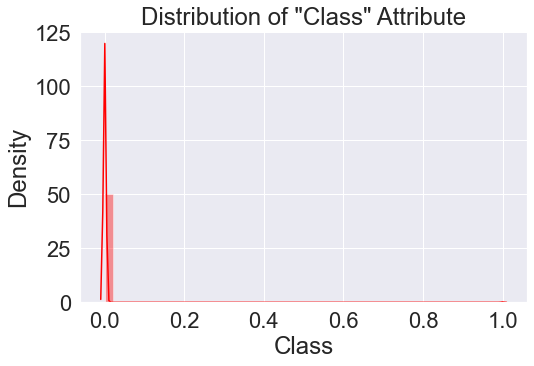

In [25]:
plt.figure(figsize=(8,5))
plt. title( 'Distribution of "Class" Attribute')
sns.distplot(c_data['Class'],color='red');

In [26]:
c_data['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

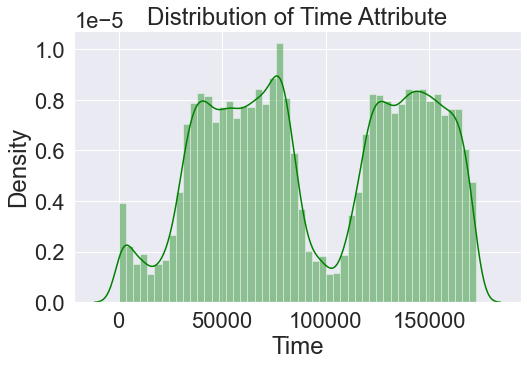

In [27]:
plt.figure(figsize=(8,5))
plt. title( 'Distribution of Time Attribute')
sns.distplot(c_data['Time'],color='green');


# Fraud cases and real cases

In [28]:
real_cases=len(c_data[c_data['Class']==0])
print('Number of real transaction',real_cases)

Number of real transaction 283253


In [29]:
fraud_cases=len(c_data[c_data['Class']==1])
print('Number of fraud transaction',fraud_cases)

Number of fraud transaction 473


# Pie chart

In [30]:
classess=c_data['Class'].value_counts()
real_cases = classess[0]/c_data['Class'].count()*100
fraud_cases = classess[1]/c_data['Class'].count()*100
print('Percentage of real cases',real_cases)
print('Percentage of fraud cases',fraud_cases)

Percentage of real cases 99.83328986416473
Percentage of fraud cases 0.1667101358352777


Class
0    99.83329
1     0.16671
Name: Class, dtype: float64


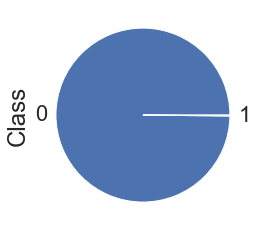

In [31]:
print((c_data.groupby('Class')['Class'].count()/c_data['Class'].count())*100)
((c_data.groupby('Class')['Class'].count()/c_data['Class'].count())*100).plot.pie();

## Describing amount column for real/fraud cases 

In [32]:
real_cases=c_data[c_data['Class']==0]

In [33]:
real_cases.Class.describe()

count    283253.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Class, dtype: float64

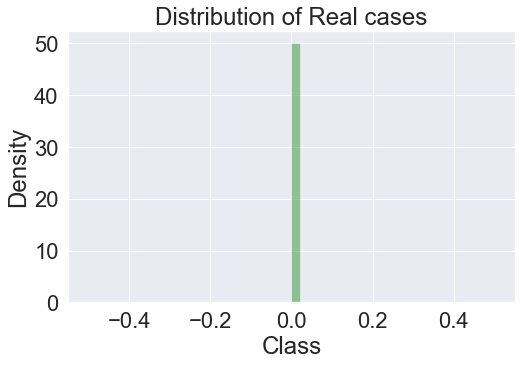

In [34]:
plt.figure(figsize=(8,5))
plt. title( 'Distribution of Real cases')
sns.distplot(real_cases.Class, color='green');

In [35]:
fraud_cases=c_data[c_data['Class']==1]

In [36]:
fraud_cases.Class.describe()

count    473.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Class, dtype: float64

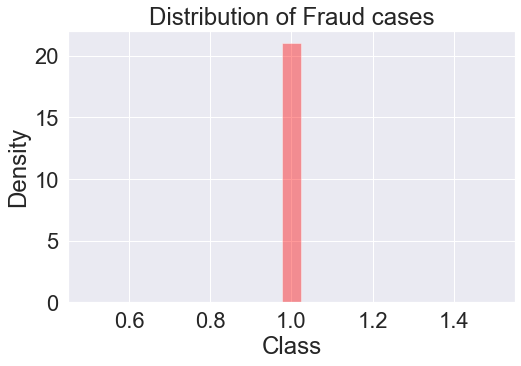

In [37]:
plt.figure(figsize=(8,5))
plt. title( 'Distribution of Fraud cases')
sns.distplot(fraud_cases.Class, color='red');

### comparing fraud and real cases

In [38]:
c_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [39]:
#we can see here is huge difference of value between fraud and real transaction

# Subplotting (Time Vs Amount)

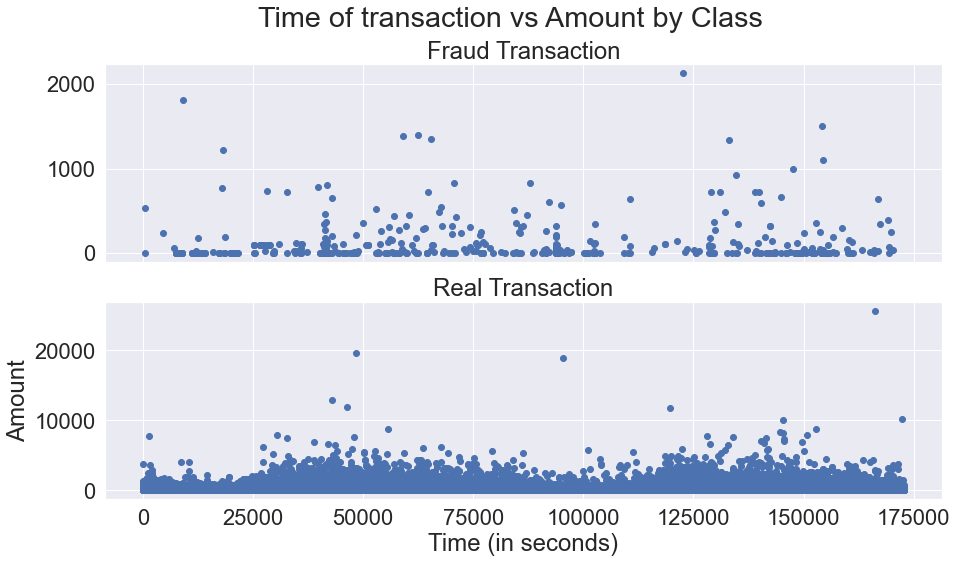

In [40]:
rcParams['figure.figsize']= 15, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f. suptitle('Time of transaction vs Amount by Class')
ax1.scatter (fraud_cases.Time, fraud_cases.Amount)
ax1.set_title('Fraud Transaction')
ax2.scatter (real_cases.Time, real_cases.Amount)
ax2.set_title('Real Transaction')
plt.xlabel("Time (in seconds)")
plt.ylabel('Amount')
plt.show()

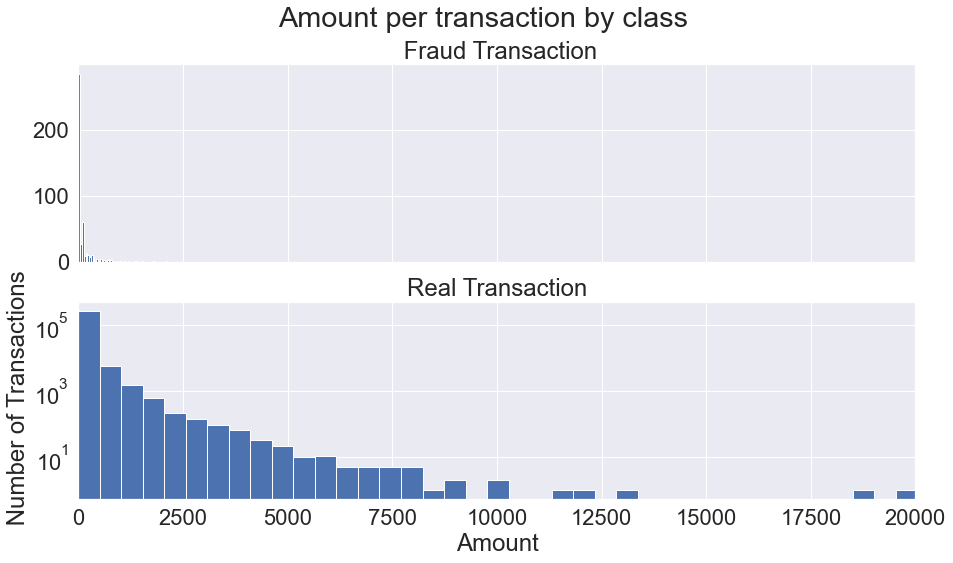

In [41]:
f, (ax1, ax2) = plt. subplots(2, 1, sharex=True)
f. suptitle('Amount per transaction by class')
bins = 50
ax1.hist (fraud_cases.Amount, bins = bins)
ax1.set_title(' Fraud Transaction')
ax2.hist (real_cases.Amount, bins = bins)
ax2.set_title('Real Transaction')
plt.xlabel('Amount')
plt.ylabel (' Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt. show();

# countplot

### Fraud and Real Cases

In [42]:
real_cases = c_data[c_data.Class==0]
fraud_cases = c_data[c_data.Class==1]

In [43]:
real_cases.shape

(283253, 31)

In [44]:
fraud_cases.shape

(473, 31)

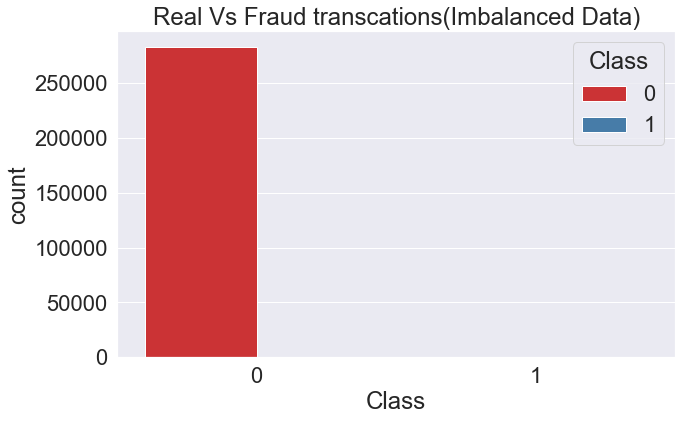

In [45]:
plt.figure(figsize = (10,6))
sns.countplot(c_data['Class'], hue=c_data['Class'], palette = "Set1")
sns.set(font_scale=2)
plt.title('Real Vs Fraud transcations(Imbalanced Data)');

In [46]:
#we can see here our dataset is fully imbalanced. so we need to balaned our dataset first. So, we use undersampling method.

# ----------------Finish----------------------

### ----------------Finish----------------------

## splitting our dataset into dependent and independent feature

In [47]:
# Import library
import sklearn
from sklearn.model_selection import train_test_split

In [48]:
# Putting feature variables into X
X = c_data.drop(['Class'], axis=1)
X.shape

(283726, 30)

In [49]:
# Putting target variable to y
y = c_data['Class']
y.shape

(283726,)

In [50]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [51]:
# Splitting data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=123)

In [52]:
print('Total number of train data of feature variable:', X_train.shape)
print('Total number of test data of feature variable:', X_test.shape)

Total number of train data of feature variable: (212794, 30)
Total number of test data of feature variable: (70932, 30)


In [53]:
print('Total number of train data of target variable:', y_train.shape)
print('Total number of test data of target variable:', y_test.shape)

Total number of train data of target variable: (212794,)
Total number of test data of target variable: (70932,)


In [54]:
X_train.shape

(212794, 30)

In [55]:
X_test.shape

(70932, 30)

# # Feature Scaling
All columns of dataset are already scaled by the PCA transformation, so we need to scale only the Amount column

### Standardization method

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
#before scaling amount data be like
c_data.Amount.head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [58]:
# Instantiate the Scaler
scaler = StandardScaler()

### Scaling the train set

In [59]:
# Fit the train data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train['Amount'].head()

35255    -0.343448
130762    0.272267
21015     0.044806
275966   -0.144066
53182    -0.229717
Name: Amount, dtype: float64

### Scaling the test set

In [60]:
#I don't fit scaler on the test set. I only transform the test set.

In [61]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test['Amount'].head()

66926     0.835156
234206   -0.318191
163840    4.244214
236675   -0.127751
210159   -0.072886
Name: Amount, dtype: float64

# Checking the Skewness

In [62]:
# Listing the columns
cols = X_train.columns

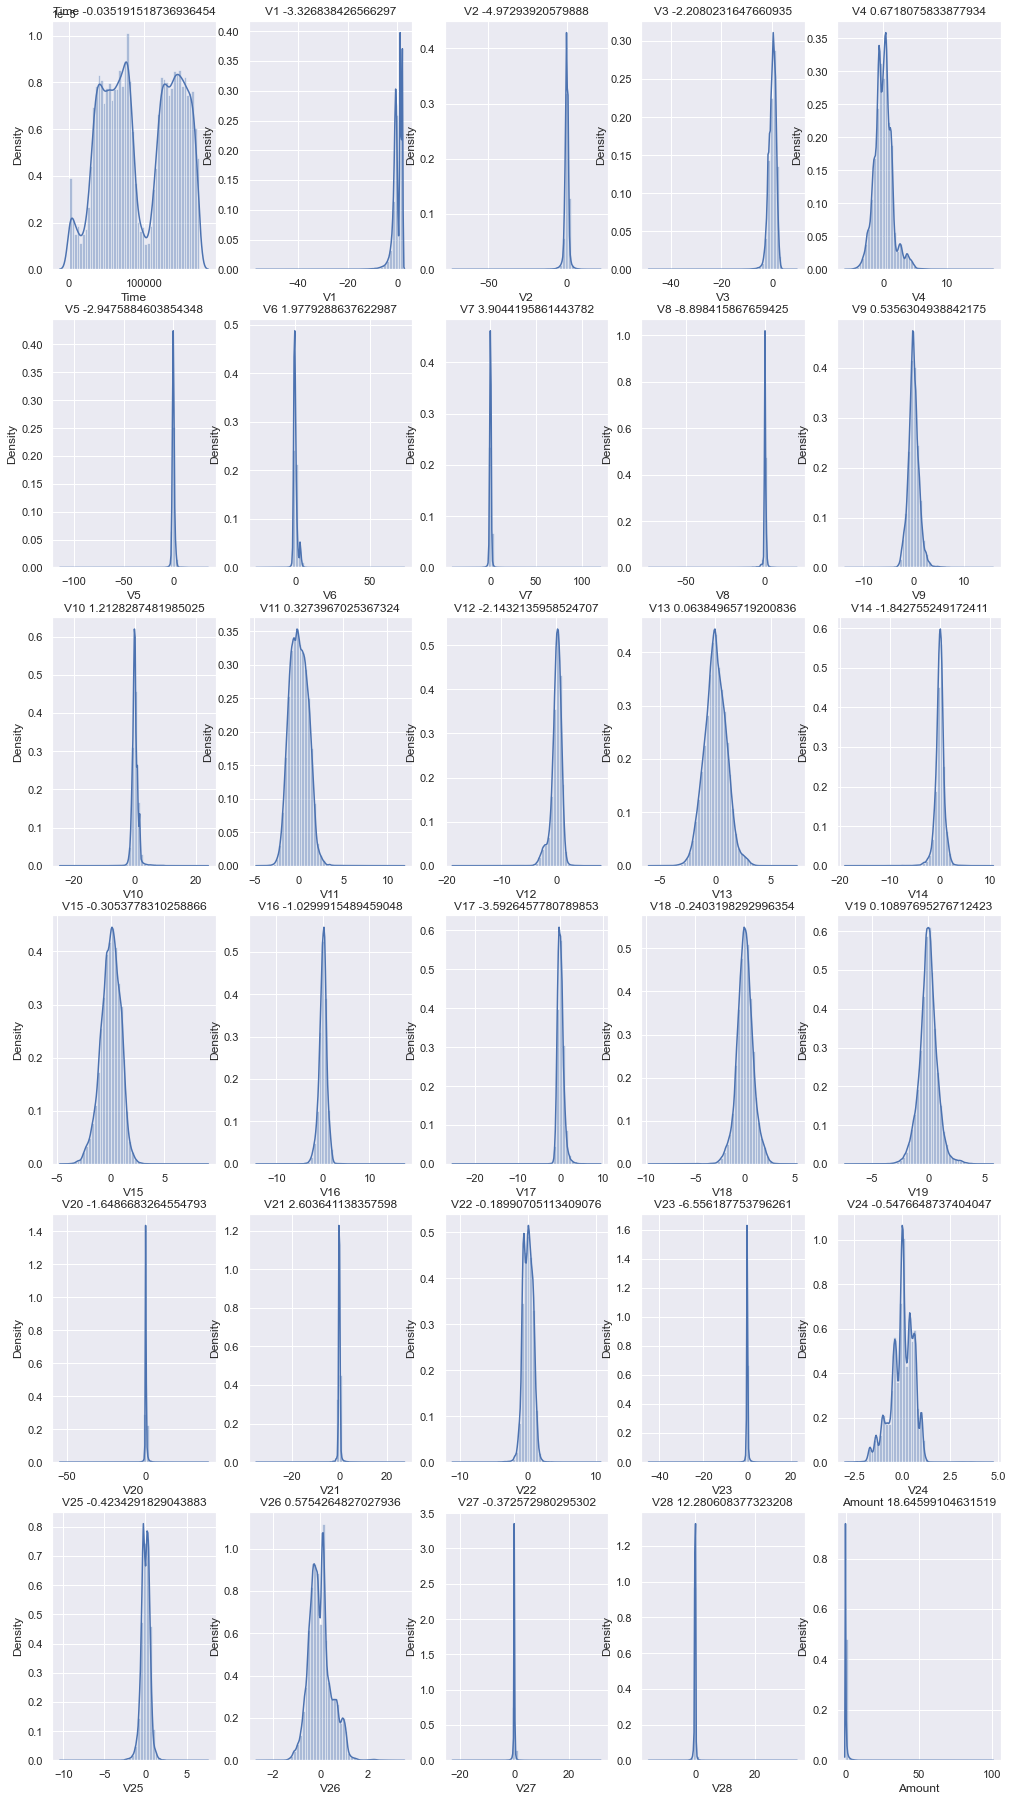

In [63]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,32))
sns.set(font_scale=1)
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

## # Reduce skeweness with PowerTransformer

In [64]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [65]:
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

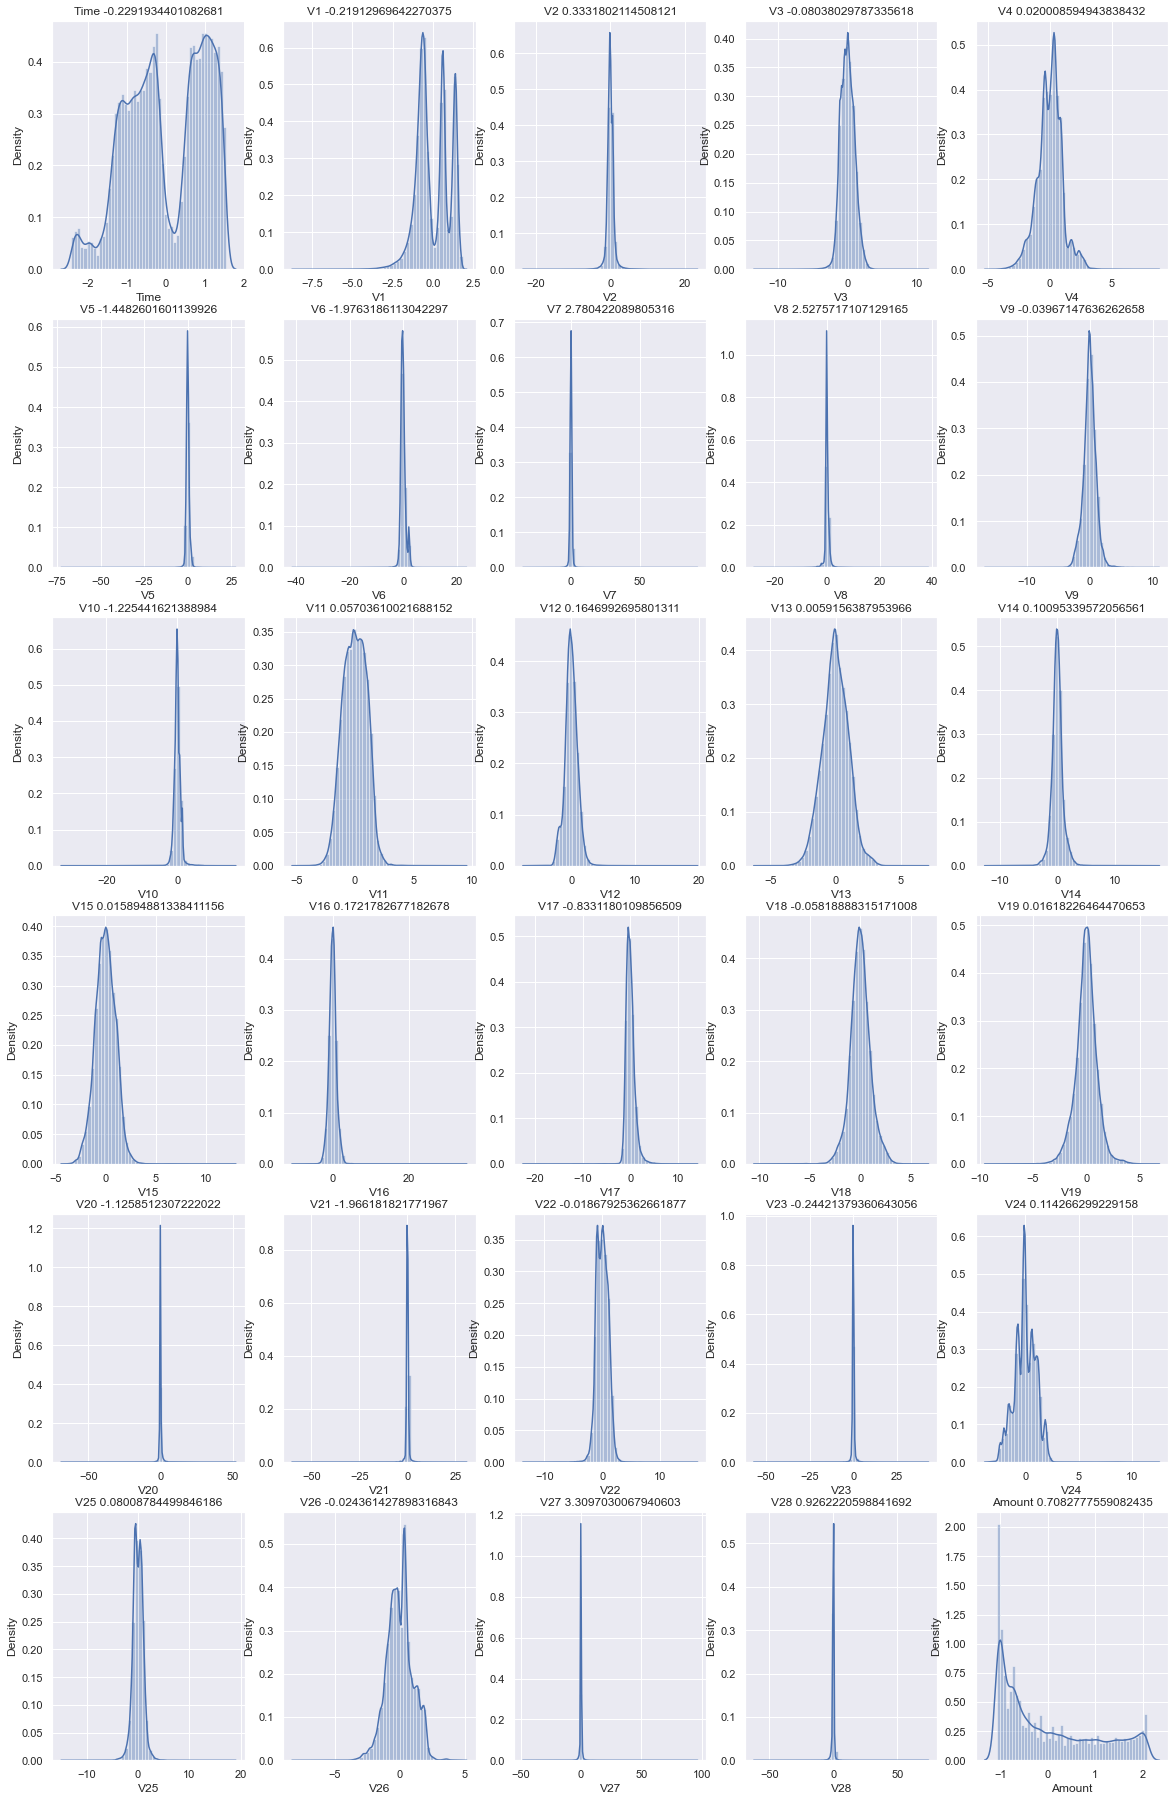

In [66]:
# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(20,32))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

# # Model

# #  Logistic regression

## Tuning hyperparameter C

In [67]:
# C is the the inverse of regularization strength in Logistic Regression.
# Higher values of C correspond to less regularization.

In [68]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [69]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

In [70]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [71]:
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


In [72]:
# Fit the model
model_cv.fit( X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [73]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9766113249065006 at C = 0.01


# # # Logistic regression with optimal C

In [74]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

# Train set

In [75]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)


In [76]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

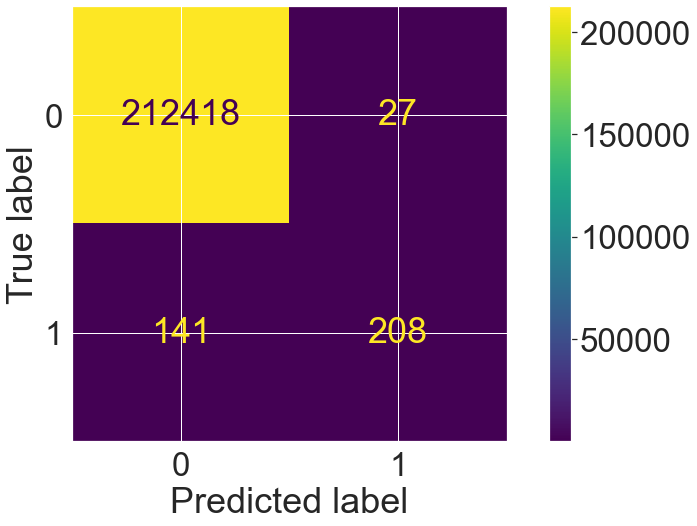

In [78]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=3)
disp.plot()
plt.show()

In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.9992105040555654


In [81]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.5959885386819485


In [82]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998729082821436


In [83]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.7123287671232876


In [85]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212445
           1       0.89      0.60      0.71       349

    accuracy                           1.00    212794
   macro avg       0.94      0.80      0.86    212794
weighted avg       1.00      1.00      1.00    212794



In [86]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

In [87]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9813495500369184

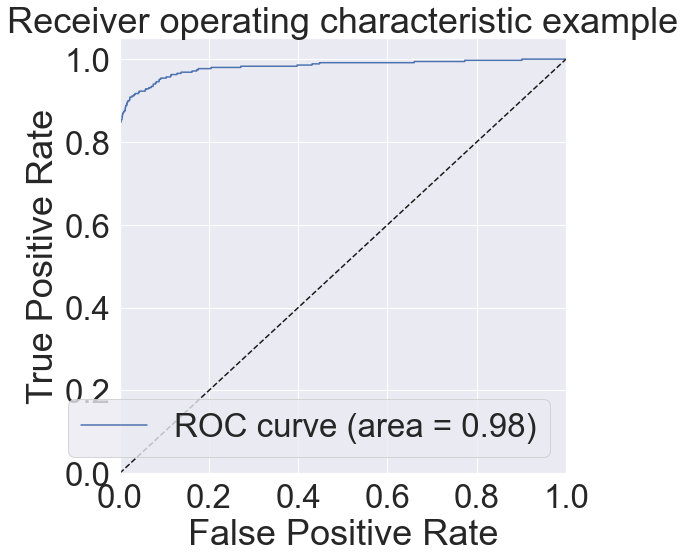

In [88]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# Test set

In [89]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

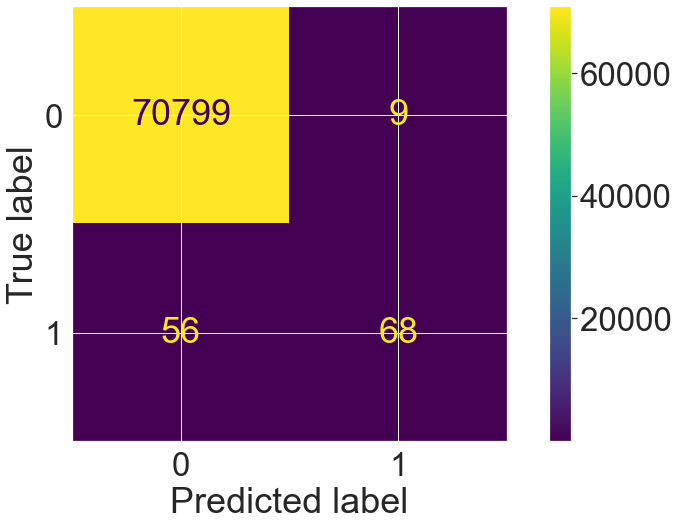

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=3)
disp.plot()
plt.show()

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.99908362939153


In [93]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.5483870967741935


In [94]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.999872895717998


In [95]:
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

F1-Score:- 0.6766169154228856


In [96]:
#classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70808
           1       0.88      0.55      0.68       124

    accuracy                           1.00     70932
   macro avg       0.94      0.77      0.84     70932
weighted avg       1.00      1.00      1.00     70932



### ROC on the test set

In [97]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

In [98]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9830494595106805

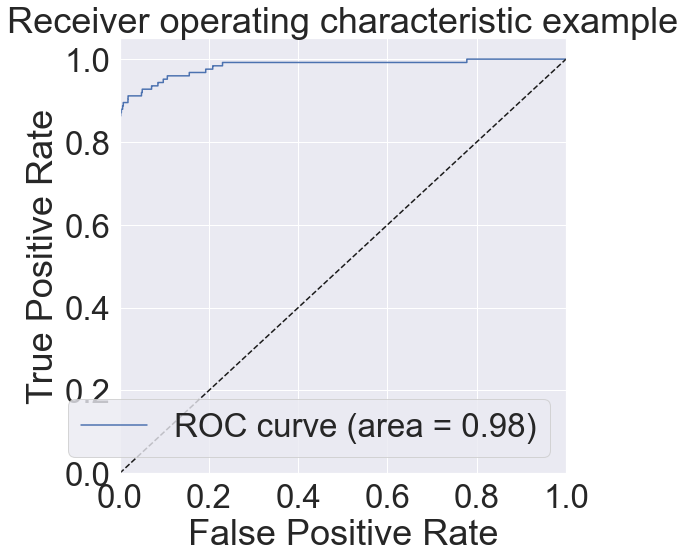

In [99]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# # -------------------------- FINISH ----------------------------#

## -------------------------- FINISH ----------------------------#

# Decision Tree

In [100]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [101]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [102]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

In [103]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [104]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9415219040725765
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


## #  Model with optimal hyperparameters

In [105]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

# Train set

In [170]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

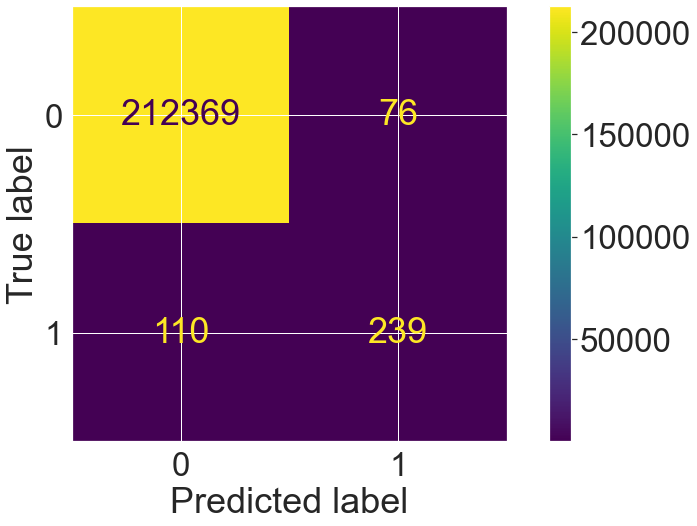

In [168]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=3)
disp.plot()
plt.show()

In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.9991259152043761


In [110]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.6848137535816619


In [111]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9996422603497376


In [112]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.7198795180722891


In [113]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212445
           1       0.76      0.68      0.72       349

    accuracy                           1.00    212794
   macro avg       0.88      0.84      0.86    212794
weighted avg       1.00      1.00      1.00    212794



In [114]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [115]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9576510313372192

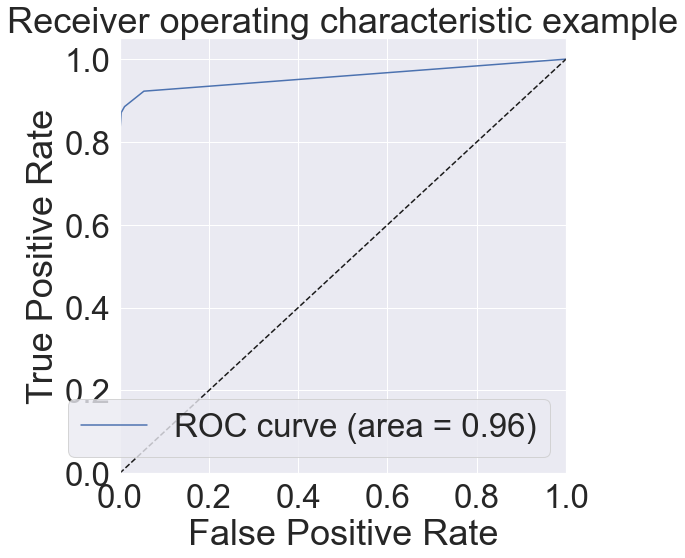

In [116]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# Test set

In [117]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

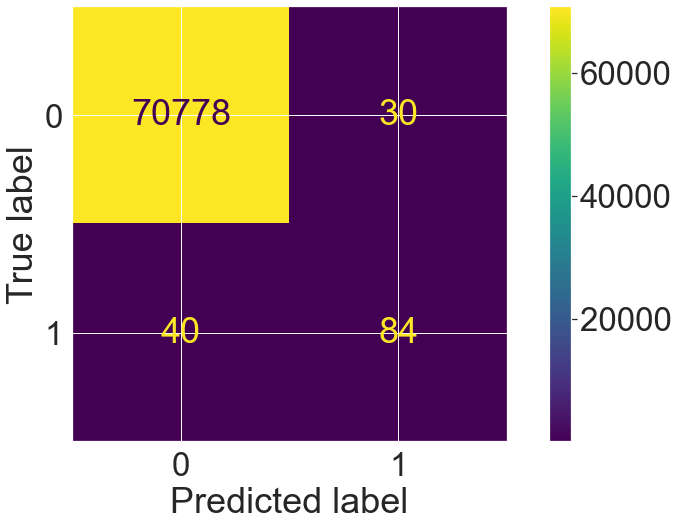

In [118]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=3)
disp.plot()
plt.show()

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.9990131393447246


In [121]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.6774193548387096


In [122]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9995763190599932


In [123]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.7198795180722891


In [124]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70808
           1       0.74      0.68      0.71       124

    accuracy                           1.00     70932
   macro avg       0.87      0.84      0.85     70932
weighted avg       1.00      1.00      1.00     70932



In [125]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [126]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9391950084918417

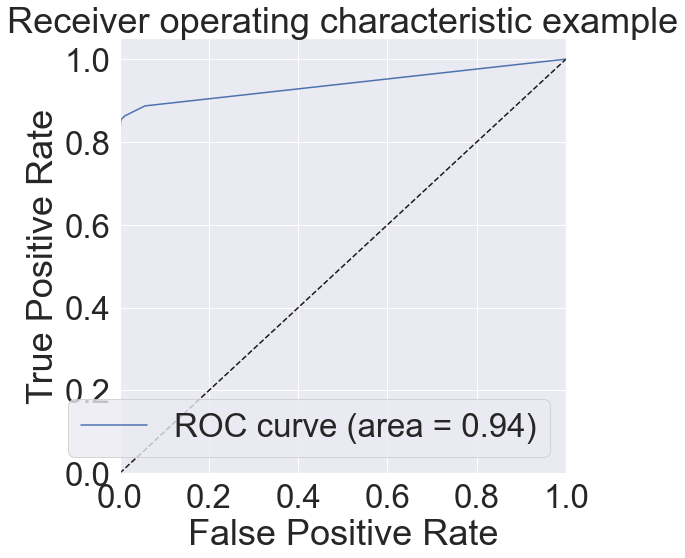

In [127]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)




# # -------------------------- FINISH ----------------------------#




# # # Random forest

In [128]:
### Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
### Using grid search cv to find the best parameters.
param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}

In [130]:
rf_cv = GridSearchCV(RandomForestClassifier(), 
                     param, 
                     cv=5,
                     scoring='roc_auc', 
                     n_jobs=-1)

In [132]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 7, 9],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [133]:
print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 20}


In [134]:
rf = RandomForestClassifier(max_depth=9, n_estimators=20)
random_forest = rf.fit(X_train,y_train)

# Train set

In [135]:
# Predictions on the train set
y_train_pred = random_forest.predict(X_train)

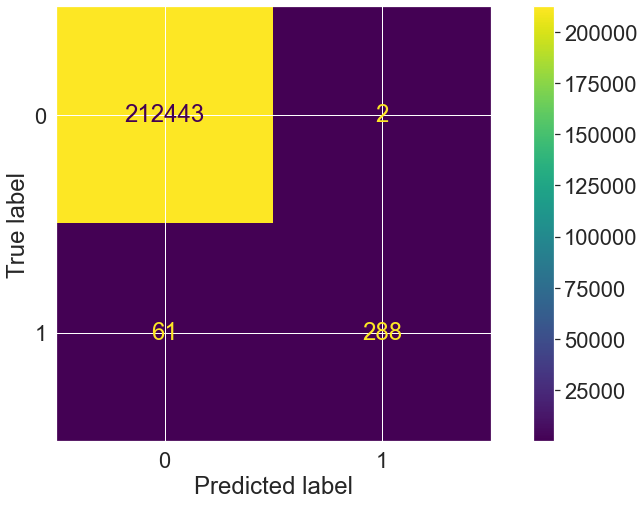

In [136]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 0.9997039390208371


In [139]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.8252148997134671


In [140]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9999905857986773


In [141]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9014084507042254


In [157]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212445
           1       0.99      0.83      0.90       349

    accuracy                           1.00    212794
   macro avg       1.00      0.91      0.95    212794
weighted avg       1.00      1.00      1.00    212794



In [158]:
# Predicted probability
y_train_pred_proba = random_forest.predict_proba(X_train)[:,1]

In [159]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.992166973133987

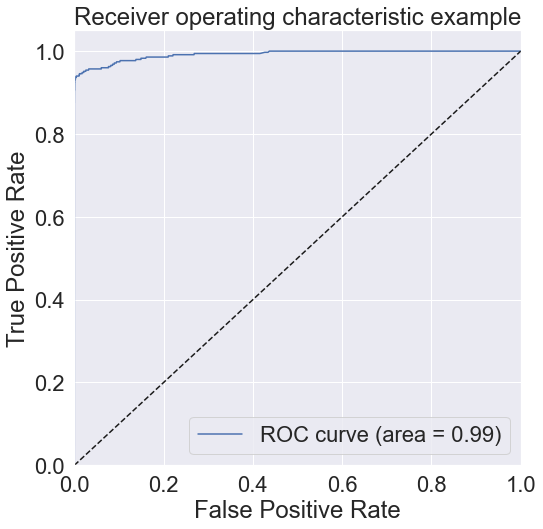

In [145]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# Test Set

In [146]:
# Predictions on the test set
y_test_pred = random_forest.predict(X_test)

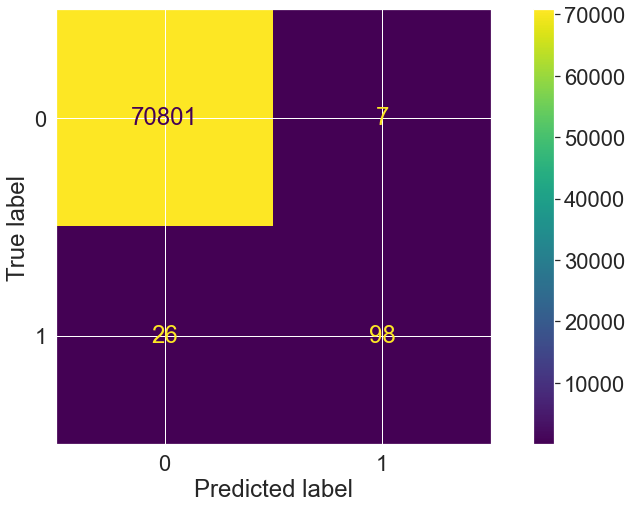

In [147]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=2)
disp.plot()
plt.show()

In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.9995347656910845


In [150]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.7903225806451613


In [151]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9999011411139984


In [152]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 0.9014084507042254


In [153]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70808
           1       0.93      0.79      0.86       124

    accuracy                           1.00     70932
   macro avg       0.97      0.90      0.93     70932
weighted avg       1.00      1.00      1.00     70932



In [154]:
# Predicted probability
y_test_pred_proba = random_forest.predict_proba(X_test)[:,1]

In [155]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9627584453734042

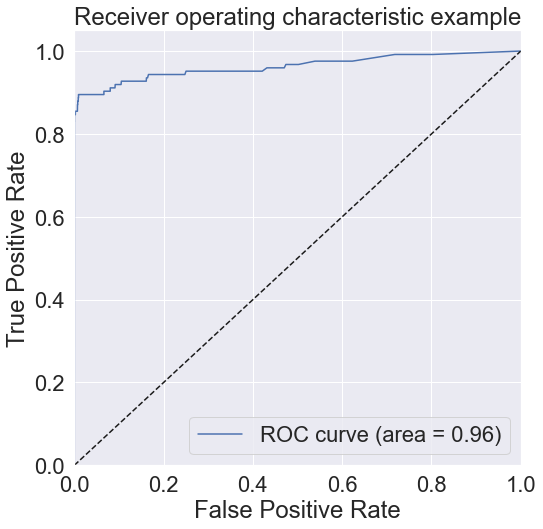

In [156]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)




# # -------------------------- FINISH ----------------------------#




# XGBoost

In [160]:
#import libraries

from xgboost import XGBClassifier
from scipy import stats

In [161]:
# Using grid search cv to find the best parameters.

param_xgb_clf = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

In [162]:

xgb_cv = GridSearchCV(XGBClassifier(),
                      param_xgb_clf,
                      cv=3,
                      scoring='roc_auc',
                      n_jobs=-1)


In [163]:
xgb_cv.fit(X_train,y_train)

[22:41:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [164]:
print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 130}


In [165]:
#Fitting the model with best parameters.

xgbst = XGBClassifier(max_depth=7 , min_child_weight= 2, n_estimators=130 )

In [166]:
xgb_imb_model = xgbst.fit(X_train,y_train)

[22:55:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Train set

In [189]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

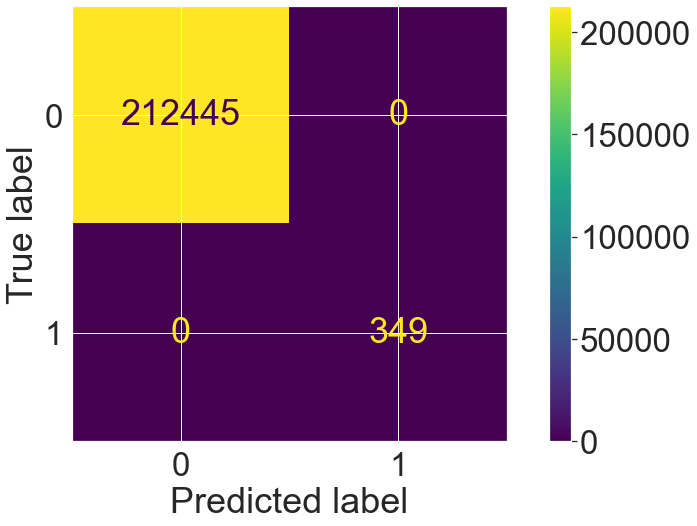

In [190]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=3)
disp.plot()
plt.show()

In [191]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [192]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

Accuracy:- 1.0


In [193]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 1.0


In [194]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 1.0


In [195]:
# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

F1-Score:- 1.0


In [196]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212445
           1       1.00      1.00      1.00       349

    accuracy                           1.00    212794
   macro avg       1.00      1.00      1.00    212794
weighted avg       1.00      1.00      1.00    212794



In [197]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [198]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

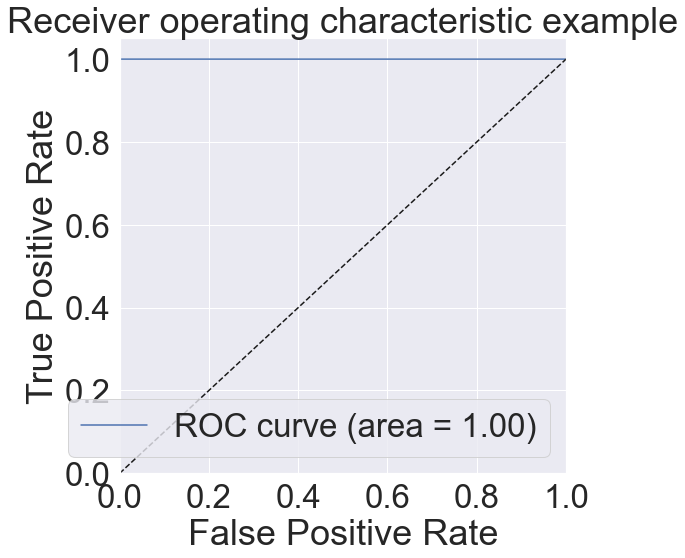

In [199]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

# Test set

In [200]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

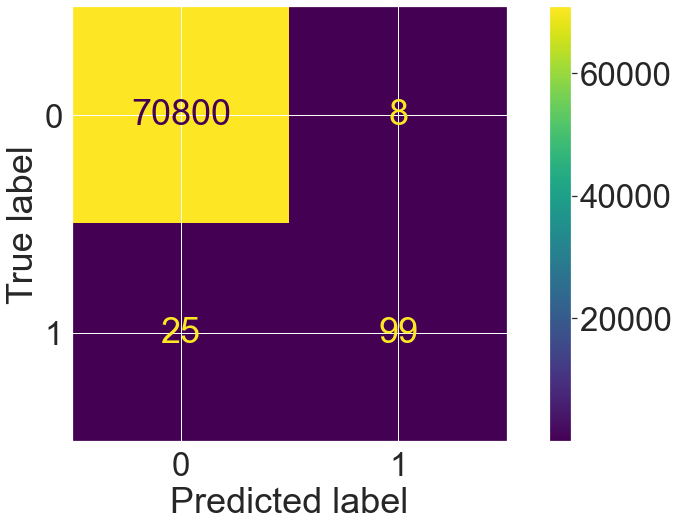

In [201]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
sns.set(font_scale=3)
disp.plot()
plt.show()

In [202]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [203]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

Accuracy:- 0.9995347656910845


In [204]:
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.7983870967741935


In [205]:
# Specificity
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998870184159981


In [206]:
# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

F1-Score:- 0.8571428571428571


In [207]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70808
           1       0.93      0.80      0.86       124

    accuracy                           1.00     70932
   macro avg       0.96      0.90      0.93     70932
weighted avg       1.00      1.00      1.00     70932



In [208]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [209]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9823323909089916

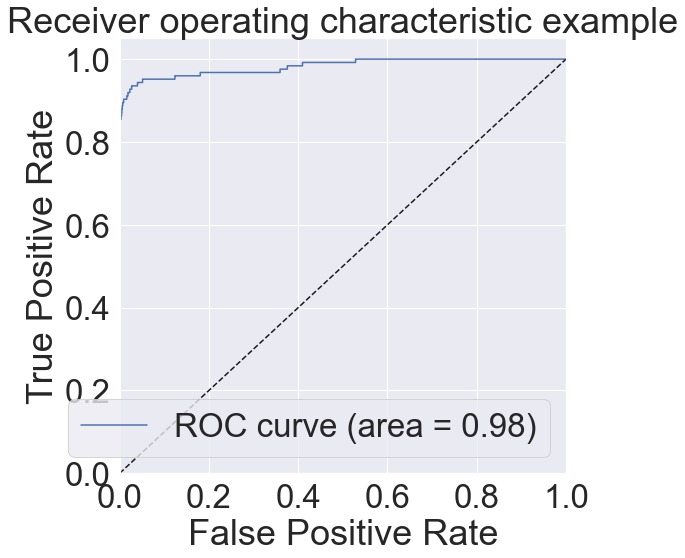

In [210]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)






# # -------------------------- FINISH ----------------------------#




